Done. You have the matrices PP QQ  RR  SS  WW.
  
Done.
Total Simulation Length =  500
Number of Initial Values Discarded =  100
  
These are the UNFILTERED SIMULATION results.
  
  
You have the matrices "Response" and "Response_named"
which contain the models simulated reponses to
given values for the exogenous stochastic processes.
  
These are expressd as %-deviations from steady state.
  
If you want, you can download these into an excel file
or use them to make plots.
  
 
 
You have the matrices "SS_level_Response" and "SS_level_Response_named" 
  
These variables are levels, which are calculated from given steady
values and simulated values for %-deviations from steady state.
  
 
 
You have the matrices "SS_ln_Response" and "SS_ln_Response_named" 
 
These are the equivalent natural log levels.
 
NOTE:  Some levels for certain variable are negative
due to their variability, i.e. large %-deviations from steady state
and the log of negative numbers is undefined.
  
  
Trend and c

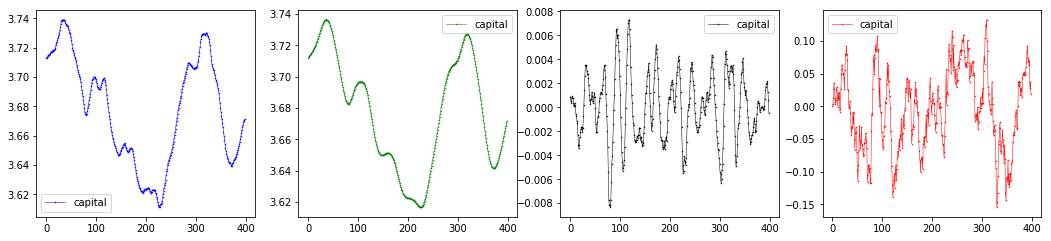

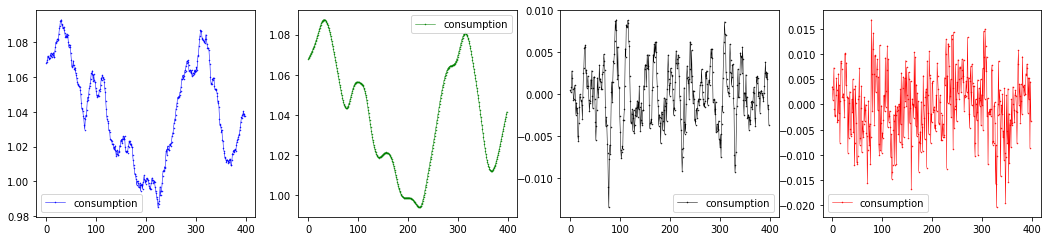

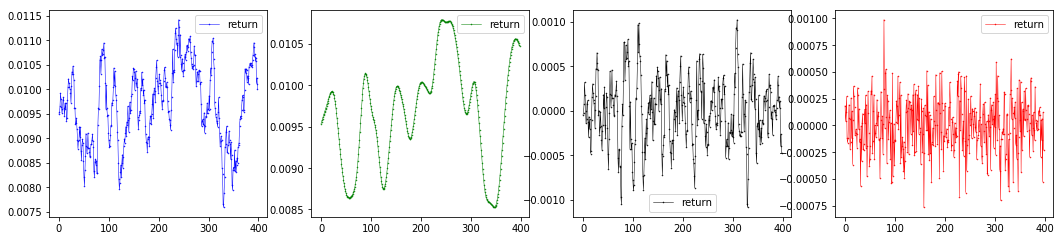

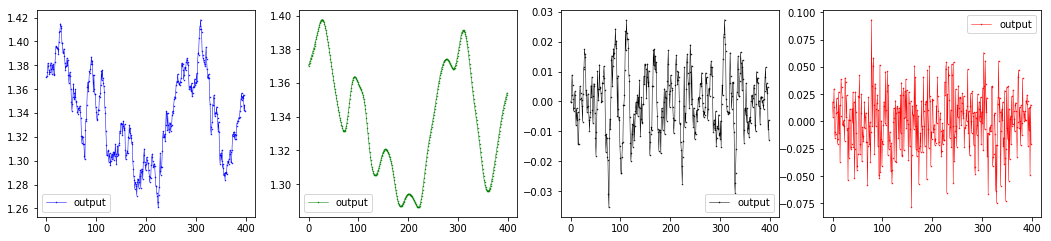

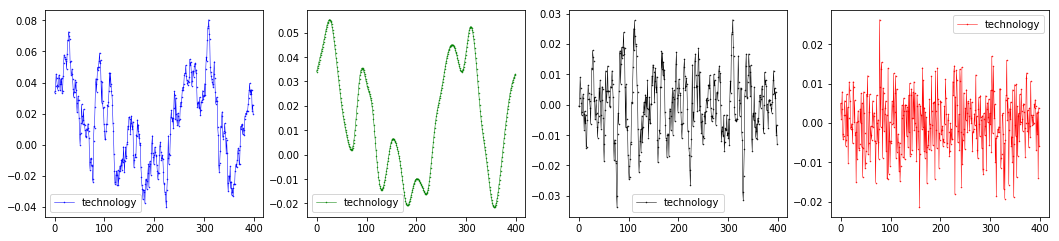

  
  
Shocks used in simulation
  


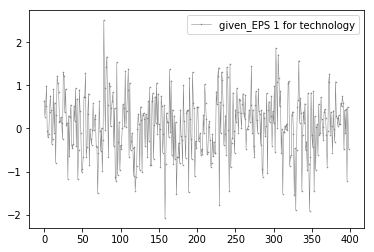

   
   
 
START:   Moments for Cyclical Ln Levels
  
  
  
Here are the table of moments.
You can also dowload the tables named Mom_Table_01 to _04.
  
  
 
Table 01:  Mean, Standard Deviation, Coefficient of Variation
                 for Cyclical Ln Levels
 


,Mean,Std Deviation,Coeff of Variation
capital,-3.356705e-06,2.828562e-03,-8.426602e+02
consumption,6.242399e-07,3.558607e-03,5.700703e+03
return,5.026241e-07,3.694192e-04,7.349810e+02
output,9.392492e-06,1.022193e-02,1.088309e+03
technology,1.121708e-05,1.032047e-02,9.200681e+02


 
 
 
Table 02:  Cross Correlation with Output, Standard Deviation Relative to Output
                 for Cyclical Ln Levels
 


,Correlation with GDP,Std Dev Relative to GDP
capital,8.749338e-02,7.656782e+00
consumption,7.668897e-01,9.632977e+00
return,1.000000e+00,1.000000e+00
output,9.611329e-01,2.767028e+01
technology,9.841034e-01,2.793703e+01


 
 
  
Table 03:  Autocorrelations  for Cyclical Ln Levels
                  corr{ y(t=0), y(t +/- i) } 
 


,capital,consumption,return,output,technology
6,2.143837e-01,4.420414e-02,-5.606265e-02,-4.164770e-02,-5.196180e-02
5,3.961059e-01,1.792656e-01,5.165495e-02,6.981582e-02,5.683691e-02
4,5.738750e-01,3.476758e-01,2.138126e-01,2.329368e-01,2.190944e-01
3,7.356761e-01,5.082453e-01,3.754813e-01,3.925223e-01,3.795884e-01
2,8.700511e-01,6.782953e-01,5.673400e-01,5.805438e-01,5.701463e-01
1,9.632285e-01,8.449456e-01,7.773598e-01,7.850983e-01,7.791596e-01
0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
-1,9.632285e-01,8.449456e-01,7.773598e-01,7.850983e-01,7.791596e-01
-2,8.700511e-01,6.782953e-01,5.673400e-01,5.805438e-01,5.701463e-01
-3,7.356761e-01,5.082453e-01,3.754813e-01,3.925223e-01,3.795884e-01


 
 
  
Table 04:  Cross Correlations with Output  for Cyclical Ln Levels
                  corr{ gdp(t=0), y(t +/- i) }
 


,capital,consumption,return,output,technology
6,6.482765e-01,3.781672e-01,-5.606265e-02,1.263246e-01,6.037081e-02
5,6.543276e-01,4.587201e-01,5.165495e-02,2.291404e-01,1.659743e-01
4,6.315230e-01,5.594666e-01,2.138126e-01,3.749184e-01,3.189823e-01
3,5.652589e-01,6.309830e-01,3.754813e-01,5.072438e-01,4.634080e-01
2,4.574523e-01,6.974662e-01,5.673400e-01,6.568984e-01,6.299886e-01
1,2.994823e-01,7.448001e-01,7.773598e-01,8.102998e-01,8.056977e-01
0,8.749338e-02,7.668897e-01,1.000000e+00,9.611329e-01,9.841034e-01
-1,-1.822614e-01,4.343392e-01,7.773598e-01,6.773194e-01,7.202138e-01
-2,-3.882173e-01,1.524793e-01,5.673400e-01,4.234704e-01,4.798844e-01
-3,-5.353269e-01,-7.815418e-02,3.754813e-01,2.038029e-01,2.683669e-01


 
 
END:   Moments for Cyclical Ln Levels
 
 
START:   Moments for Ln First Differences
  
  
  
Here are the table of moments.
You can also dowload the tables named Mom_Table_01 to _04.
  
  
 
Table 01:  Mean, Standard Deviation, Coefficient of Variation
                 for Ln First Differences
 


,Mean,Std Deviation,Coeff of Variation
capital,-4.202206e-03,6.071696e-02,-1.444883e+01
consumption,-2.100401e-04,6.428017e-03,-3.060376e+01
return,1.737982e-06,2.561193e-04,1.473660e+02
output,-2.325494e-04,2.655047e-02,-1.141713e+02
technology,-2.223923e-05,7.174314e-03,-3.225973e+02


 
 
 
Table 02:  Cross Correlation with Output, Standard Deviation Relative to Output
                 for Ln First Differences
 


,Correlation with GDP,Std Dev Relative to GDP
capital,1.341210e-01,2.370651e+02
consumption,8.401475e-01,2.509774e+01
return,1.000000e+00,1.000000e+00
output,9.760849e-01,1.036644e+02
technology,9.903232e-01,2.801160e+01


 
 
  
Table 03:  Autocorrelations  for Ln First Differences
                  corr{ y(t=0), y(t +/- i) } 
 


,capital,consumption,return,output,technology
6,6.136195e-01,1.970074e-01,4.337687e-02,6.231703e-02,4.899059e-02
5,6.752455e-01,1.245949e-01,-7.809770e-02,-5.320836e-02,-7.076818e-02
4,7.459324e-01,2.320968e-01,4.302455e-02,6.622264e-02,4.984703e-02
3,8.116805e-01,2.172560e-01,-1.013025e-03,2.564307e-02,6.766769e-03
2,8.771608e-01,2.474929e-01,1.769462e-02,4.537379e-02,2.558733e-02
1,9.409351e-01,2.802235e-01,3.891638e-02,6.803100e-02,4.724248e-02
0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
-1,9.409351e-01,2.802235e-01,3.891638e-02,6.803100e-02,4.724248e-02
-2,8.771608e-01,2.474929e-01,1.769462e-02,4.537379e-02,2.558733e-02
-3,8.116805e-01,2.172560e-01,-1.013025e-03,2.564307e-02,6.766769e-03


 
 
  
Table 04:  Cross Correlations with Output  for Ln First Differences
                  corr{ gdp(t=0), y(t +/- i) }
 


,capital,consumption,return,output,technology
6,1.714963e-01,1.271193e-01,4.337687e-02,7.868468e-02,6.615972e-02
5,1.545812e-01,2.472192e-02,-7.809770e-02,-4.002143e-02,-5.422657e-02
4,1.786352e-01,1.307563e-01,4.302455e-02,7.991722e-02,6.681719e-02
3,1.617931e-01,8.777310e-02,-1.013025e-03,3.453382e-02,2.167426e-02
2,1.579849e-01,1.000328e-01,1.769462e-02,5.140825e-02,3.931617e-02
1,1.502860e-01,1.120908e-01,3.891638e-02,6.980915e-02,5.885575e-02
0,1.341210e-01,8.401475e-01,1.000000e+00,9.760849e-01,9.903232e-01
-1,-2.086772e-01,-8.437082e-02,3.891638e-02,-8.937188e-03,8.584428e-03
-2,-2.191202e-01,-1.063579e-01,1.769462e-02,-3.131791e-02,-1.349585e-02
-3,-2.220342e-01,-1.222967e-01,-1.013025e-03,-4.966700e-02,-3.207917e-02


 
 
END:   Moments for Ln First Differences
 


In [5]:
#  Uhlig's Exampl0.m
#  Stochastic Neoclassical Growth Model

import numpy as np

Z_bar = 1
rho = 0.36
delta = 0.025
R_bar = 1.01
eta = 1.0
psi  = 0.95
sigma_sigma = 0.712

betta   = 1.0/R_bar
K_bar   = ((rho*Z_bar)/(R_bar - 1 + delta))**(1.0/(1 - rho))
Y_bar   = Z_bar*K_bar**rho
C_bar   = Y_bar - delta*K_bar

VARNAMES = ['capital',
                         'consumption',
                         'return',
                         'output',
                         'technology']

SteadyState = [[K_bar],
                         [C_bar],
                         [R_bar],
                         [Y_bar],
                         [1]]

AA = np.vstack(([0],
                          [- K_bar/C_bar], 
                          [0]))

BB = np.vstack(([ - (1 - betta*(1-delta))*(1-rho)],
                           [K_bar/(betta * C_bar)], 
                           [rho]))

CC = np.vstack(( [0, -1, 0],
                            [-1, 0, 0],
                            [0, 0, -1]))

DD = np.vstack (([(1- betta*(1-delta))],
                            [(1 + delta * K_bar/C_bar)],
                            [1]))

FF = [0]

GG = [0]

HH = [0]

JJ = [-eta, 1, 0]

KK = [eta, 0, 0]

LL = [0]

MM = [0]

NN = [psi]

Sigma = [sigma_sigma**2]

Sigma_EPS = Sigma


%run Uhlig_solver_abreviated.ipynb

#print(' ')
#print('PP')
#print(PP.shape)
#print(PP)
#print(' ')
#print('RR')
#print(RR.shape)
#print(RR)
#print(' ')
#print('QQ')
#print(QQ.shape)
#print(QQ)
#print(' ')
#print('SS')
#print(SS.shape)
#print(SS)
#print(' ')


%run Uhlig_simul_rand.ipynb

%run Detrend_Filters.ipynb

##  USER INPUT:  Remember to set
##  output_index  in the Calc_Moments.ipynb
## This is different for each model

output_index = 3


#  To calculate moments for cyclical ln levels

print(' ')
print('START:   Moments for Cyclical Ln Levels')

Input_momat =  Mat_ln_cycle
Input_momat_named = Mat_ln_cycle_named
label_mom = 'for Cyclical Ln Levels'

%run Calc_Moments.ipynb

print('END:   Moments for Cyclical Ln Levels')
print(' ')

#  To calculate moments for ln first differences

print(' ')
print('START:   Moments for Ln First Differences')

Input_momat =  Mat_ln_1st_diff 
Input_momat_named = Mat_ln_1st_diff_named
label_mom = 'for Ln First Differences'

%run Calc_Moments.ipynb

print('END:   Moments for Ln First Differences')
print(' ')


